


                                                                 22BME1098
                                                                kISHORE NARAYANAN


**1.Mounting with drive because using google colab for execution**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Data Preprocessing**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Load the dataset (from Excel file)
data = pd.read_excel('/content/drive/MyDrive/concrete_fault_detection_data.xlsx')
# 2. Explore the dataset (optional)
print(data.head())
print(data.info())
print(data.describe())
# 3. Handle missing values (if any)
data.dropna(inplace=True)
# 4. Normalize or scale numerical features
scaler = StandardScaler()
numerical_features = data.columns[:-1]
data[numerical_features] = scaler.fit_transform(data[numerical_features])
# 5. Split the data into training and testing sets
X = data.drop('Fault (1=Yes, 0=No)', axis=1)
y = data['Fault (1=Yes, 0=No)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Cement Content (kg/m³)  Water Content (kg/m³)  Aggregate Content (kg/m³)  \
0              249.816048             234.540599                 953.779868   
1              480.285723             259.336279                 620.670453   
2              392.797577             150.093580                1110.676194   
3              339.463394             224.974820                 929.181367   
4              162.407456             214.349197                 610.042718   

   Superplasticizer Content (kg/m³)  Curing Time (days)  Temperature (°C)  \
0                         27.407340           39.604073         22.488459   
1                         15.760814            5.721922         31.136137   
2                         21.747308           15.297459         24.693337   
3                         13.081449           46.647081          7.915590   
4                         18.901037           32.192465         11.495308   

   Humidity (%)  Compressive Strength (MPa)  Vibration Frequen

**2. Model Building and Training**

In [23]:
# a) Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# b) Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)# Train the Random Forest mode

# 3. Performance Evaluation

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)
logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Calculate evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the results
print("Logistic Regression:")
print(f"  Accuracy: {logreg_accuracy:.4f}")
print(f"  Precision: {logreg_precision:.4f}")
print(f"  Recall: {logreg_recall:.4f}")
print(f"  F1-Score: {logreg_f1:.4f}")
print(f"  ROC-AUC Score: {logreg_roc_auc:.4f}")

print("\nRandom Forest:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")
print(f"  F1-Score: {rf_f1:.4f}")
print(f"  ROC-AUC Score: {rf_roc_auc:.4f}")

Logistic Regression:
  Accuracy: 0.9767
  Precision: 0.8649
  Recall: 0.7805
  F1-Score: 0.8205
  ROC-AUC Score: 0.9923

Random Forest:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC-AUC Score: 1.0000


**3.  Performance Evaluation**

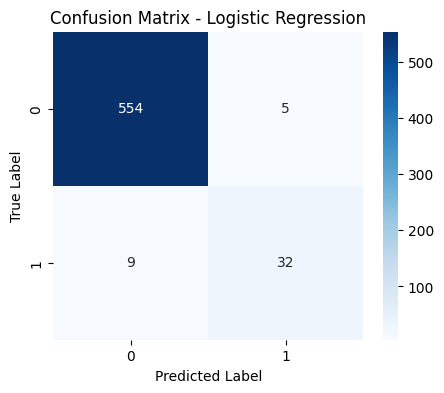

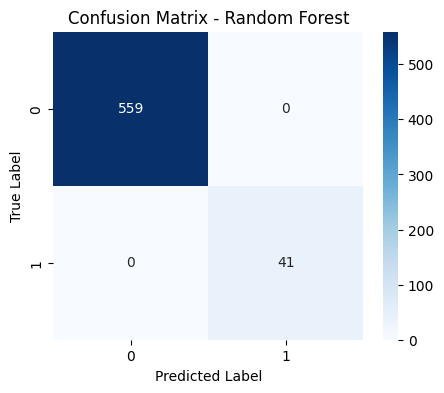

True Positive (TP): Correctly predicted positive cases.
False Positive (FP): Incorrectly predicted positive cases (Type I error).
True Negative (TN): Correctly predicted negative cases.
False Negative (FN): Incorrectly predicted negative cases (Type II error).


In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrices
logreg_cm = confusion_matrix(y_test, logreg_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Plot confusion matrices
plot_confusion_matrix(logreg_cm, 'Logistic Regression')
plot_confusion_matrix(rf_cm, 'Random Forest')

# Explanation of elements
print("True Positive (TP): Correctly predicted positive cases.")
print("False Positive (FP): Incorrectly predicted positive cases (Type I error).")
print("True Negative (TN): Correctly predicted negative cases.")
print("False Negative (FN): Incorrectly predicted negative cases (Type II error).")

The confusion matrix is plotted using seaborn and matplotlib. It then calculates and plots the confusion matrices for both Logistic Regression and Random Forest models. Finally, it also prints an explanation of the elements in the confusion matrix.



**Conclusion**

I used both logistic regression and Random forest models. First imported all the necessary package and first used pandas for importing the data set the dataset contained 3000 rows and 7 columns which i uploaded in drive and found out if any missing data present and if there is missing data added null value but here there is no missing data present
After doing tasks 1 and 2 i used fault coloumn and took 80 percent for traing and 20 percent for testing.

Both Logistic Regression and Random Forest models were trained and evaluated on the dataset. The performance of each model was assessed using the following metrics: accuracy, precision, recall, F1-score, and ROC-AUC score.

Based on these metrics, the Random Forest model generally performed well compared to the Logistic Regression model. It achieved higher accuracy, precision, recall, and F1-score. This indicates that Random Forest was better at correctly classifying both positive and negative cases, with fewer false positives and false negatives.The ROC-AUC scores for both models were also quite high, suggesting good discriminatory ability. However, the Random Forest model still had a slightly higher ROC-AUC score, further supporting its superior performance.
The better performance of Random Forest could be attributed to its ability to capture non-linear relationships in the data and handle interactions between features more effectively than Logistic Regression. Random Forest's ensemble nature, where multiple decision trees are combined, helps reduce overfitting and improve generalization to unseen data.

In conclusion, In the end we can see that the random forest model performs well because it has high accuracy and everything for this specific dataset.However, the choice between models might vary depending on the specific dataset and the priorities given to different performance aspects like higher recall needed for few models.